In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Cargar dataset California Housing
california = fetch_california_housing(as_frame=True)
X = california.data
y = california.target
X.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
# Inicializar modelos
lr = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=5)
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Linear Regression
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# KNeighbors
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Random Forest
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)


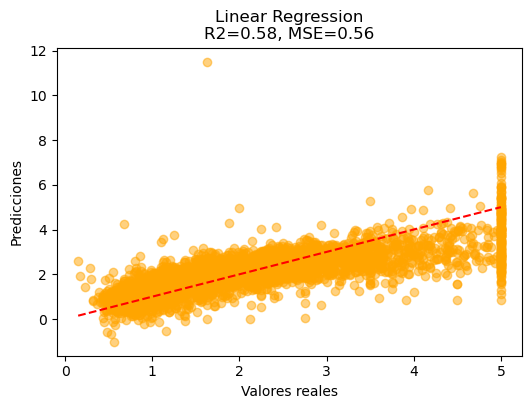

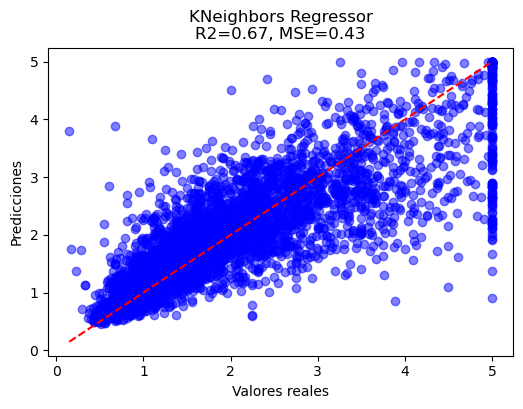

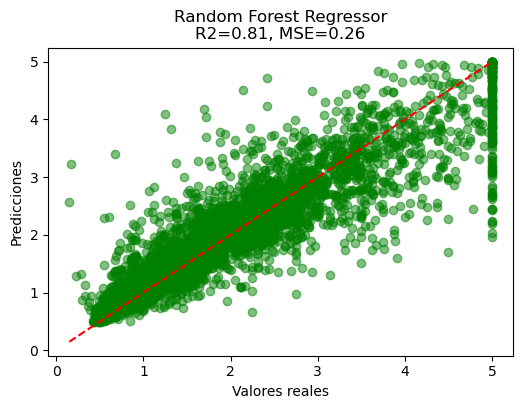

In [6]:
# Linear Regression
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_lr, alpha=0.5, color="orange")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title(f"Linear Regression\nR2={r2_lr:.2f}, MSE={mse_lr:.2f}")
plt.show()

# KNeighbors
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_knn, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title(f"KNeighbors Regressor\nR2={r2_knn:.2f}, MSE={mse_knn:.2f}")
plt.show()

# Random Forest
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title(f"Random Forest Regressor\nR2={r2_rf:.2f}, MSE={mse_rf:.2f}")
plt.show()


              Modelo       MSE        R2
0  Linear Regression  0.555892  0.575788
1         KNeighbors  0.432422  0.670010
2      Random Forest  0.255368  0.805123


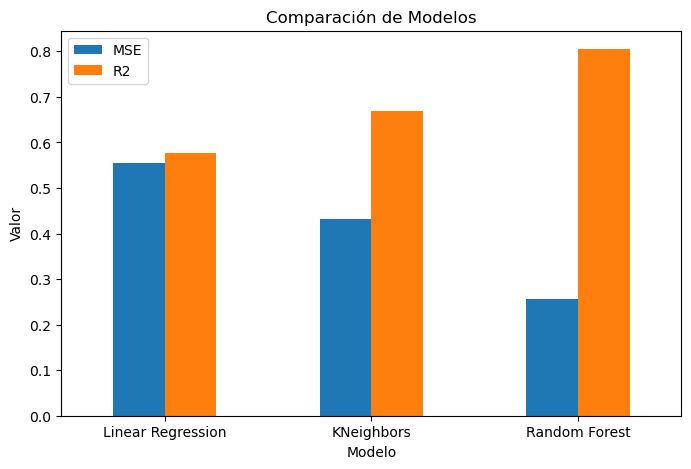

In [7]:
resultados = {
    "Modelo": ["Linear Regression", "KNeighbors", "Random Forest"],
    "MSE": [mse_lr, mse_knn, mse_rf],
    "R2": [r2_lr, r2_knn, r2_rf]
}

df_resultados = pd.DataFrame(resultados)
print(df_resultados)

# Grafica comparativa
df_resultados.set_index("Modelo")[["MSE", "R2"]].plot(kind="bar", figsize=(8,5))
plt.title("Comparación de Modelos")
plt.ylabel("Valor")
plt.xticks(rotation=0)
plt.show()
